<a href="https://colab.research.google.com/github/Ayden0nnn/Programming-Language/blob/main/Programming_Language_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import csv
import matplotlib
import seaborn as sns

In [ ]:
from google.colab import files
data_cost = files.upload()
data_happiness = files.upload()


In [ ]:
data_cost = pd.read_csv('cost_of_living.csv')
data_happiness = pd.read_csv('happiness.csv')
data_cost.head()
# data_happiness.head()

,Countries,"Cost of living, 2017",Global rank,Available data
0,Bermuda,225.86,1,2017 - 2017
1,Iceland,209.10,2,2017 - 2017
2,Switzerland,197.89,3,2017 - 2017
3,Norway,186.52,4,2017 - 2017
4,Denmark,171.78,5,2017 - 2017


#Q1.隨機取樣生活費用?

In [ ]:
data = pd.read_csv('cost_of_living.csv', header=None)
sample = data.sample(frac=0.05)
sample

,0,1,2,3
42,Slovenia,103.47,42,2017 - 2017
167,Egypt,27.37,167,2017 - 2017
136,Sri Lanka,52.19,136,2017 - 2017
51,Argentina,93.54,51,2017 - 2017
162,Burma,41.08,162,2017 - 2017
144,Armenia,49.68,144,2017 - 2017
130,Bolivia,53.79,130,2017 - 2017
37,Portugal,106.46,37,2017 - 2017


# Q2.幾個國家的cost_of_living在100以上?

In [ ]:
data = pd.read_csv('cost_of_living.csv')
data['Cost of living, 2017'] = pd.to_numeric(data['Cost of living, 2017'], errors='coerce')
countries_above_100 = data[data['Cost of living, 2017'] > 100]
print("有{}個國家的cost_of_living在100以上。".format(len(countries_above_100)))

有43個國家的cost_of_living在100以上。


#Q3.高cp值國家在五大洲之比例
y軸數值越低，代表快樂cp值越高，能發現在歐洲和大洋洲之快樂cp值較高，而我們身處的亞洲，反而之快樂cp值最差的地區，亞洲比起非洲和南美洲，收入並無較差，但因社會風氣及政策問題，人民反而過得不開心。

In [ ]:
import pandas as pd

# Load the CSV files into Pandas DataFrames
happiness_df = pd.read_csv('happiness.csv')
cost_of_living_df = pd.read_csv('cost_of_living.csv')

# Merge the DataFrames based on the "Countries" column
merged_df = happiness_df.merge(cost_of_living_df, on='Countries', how='inner')

# Calculate the result and add it as a new column
merged_df['Happiness Index / Cost of Living'] = merged_df['Happiness index, 2022'] / merged_df['Cost of living, 2017']

# Sort the merged DataFrame by the "Happiness Index / Cost of Living" column
merged_df.sort_values(by='Happiness Index / Cost of Living', ascending=True, inplace=True)

# Specify the output CSV file name
output_file = 'merged_data_sorted_with_result.csv'

# Save the sorted DataFrame to the output CSV file
merged_df.to_csv(output_file, index=False)

print(f'Merged data sorted by "Happiness Index / Cost of Living" and saved to {output_file}')

Merged data sorted by "Happiness Index / Cost of Living" and saved to merged_data_sorted_with_result.csv


In [ ]:
import pandas as pd
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

# Read the CSV file into a DataFrame
df = pd.read_csv('merged_data_sorted_with_result.csv')

# Function to get the continent code for a given country name
def get_continent(country_name):
    try:
        country_alpha2 = country_name_to_country_alpha2(country_name)
        continent_code = country_alpha2_to_continent_code(country_alpha2)
        return continent_code
    except:
        return None

# Add a new "Continent" column to the DataFrame
df['Continent'] = df['Countries'].apply(get_continent)

# Save the updated DataFrame to a new CSV file
output_file = 'merged_data_with_continent.csv'
df.to_csv(output_file, index=False)

print(f'Updated data with continent information saved to {output_file}')

Updated data with continent information saved to merged_data_with_continent.csv


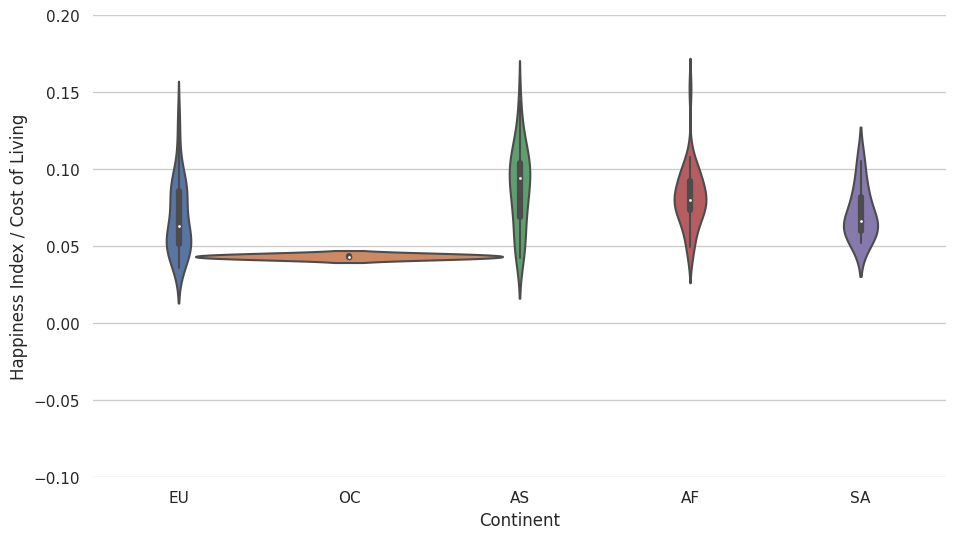

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset with continent information
df = pd.read_csv('merged_data_with_continent.csv')

# Set Seaborn theme and style
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violin plot with 'Continent' as the level
sns.violinplot(x='Continent', y='Happiness Index / Cost of Living', data=df, width=1.8)

# Finalize the figure
ax.set(ylim=(-.1, .2))
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()
